In [2]:
import matplotlib.pyplot as plt
from scipy.misc import imresize #, imread, imshow
import cv2
%pylab inline 
from IPython.display import clear_output

Populating the interactive namespace from numpy and matplotlib


In [6]:
path = '../../haar_cascade/'

In [7]:
IMAGES = []
LABELS = []

## Load everything to the memory

File `good.dat` is a text file each line of which has 

* `FileName.jpeg`: of a picture with a cross on it

* `c`: is a number of crosses on the pic (always 1 for good.dat)

* `x1 y1 x2 y2`: are coordinates of top left corner and bottom right corner where the cross is

All the pics have size (480 x 640)

In [8]:
# new image size is 10 times smaller
# otherwise it's too big, also pointless
image_size = (480, 640)
dev = 10
image_size = tuple(int(x/dev) for x in image_size)

with open(path+'good.dat') as file:
    LINES = file.readlines()
for line in LINES:
    filename,c,x,y,x2,y2 = line.strip().split(' ')
    split = line.strip().split(' ')
    filename = split[0]
    c = int(split[1])
    param = [int(int(x)/dev) for x in split[2:]]
    LABELS.append((c, *param))
    # reading and resizing the image 
    image = cv2.imread(path+filename)
    image = imresize(image, image_size)
    IMAGES.append(image)
    print('\r' + filename, end='')
    
with open(path+'bad.dat') as file:
    LINES = file.readlines()
for line in LINES:
    filename = line.strip()
    # labels filled with `0`: no cross
    LABELS.append((0,0,0,0,0))
    # reading and resizing the image
    image = cv2.imread(path+filename)
    image = imresize(image, image_size)
    IMAGES.append(image)
    print('\r' + filename, end='')
print('\nDone')
# at this point I have list of IMAGES and LABELS (c, x1, y1, x2, y2)
print(len(IMAGES))
print(len(LABELS))

bad/non-cross2290.jpg
Done
4448
4448


## Visualization of what's inside

In [14]:
def show_image(num):
    frame = IMAGES[num]
    title("Input Stream")
    # Display the frame    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    c,x1,y1,x2,y2 = LABELS[num]
    if c > 0:
        frame = cv2.rectangle(frame, (x1,y1), (x2,y2), (0, 255, 0))
    imshow(frame)
    show()
    print('\r{:04d}:({} {}) ({} {})'.format(num, x1, y1, x2, y2), end='')
    clear_output(wait=True)

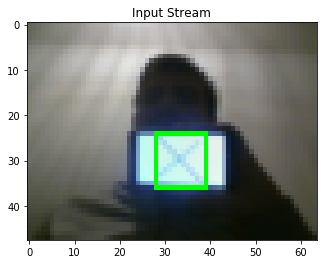

0089:(28 24) (39 36)

In [15]:
for x in range (len(IMAGES)):
    try:
        show_image(x)
    except KeyboardInterrupt:
        clear_output(wait=False)
        show_image(x)
        break

In [10]:
X = np.array((IMAGES, LABELS))

In [11]:
np.save('data.npy', X)

In [17]:
X = np.array(IMAGES, dtype=np.int)
Y = np.array(LABELS)

In [18]:
O = np.array((X, Y))
print(X.shape, O.shape)

ValueError: could not broadcast input array from shape (4448,48,64,3) into shape (4448)

In [12]:
print(X.shape)

(2, 4448)
